In [1]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(1)

rna_embeddings = np.loadtxt('./output/atac_switch_embeddings.txt')
atac_embeddings = np.loadtxt('./output/rna_switch_embeddings.txt')
print(rna_embeddings.shape)
print(atac_embeddings.shape)
embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)
embeddings=np.nan_to_num(embeddings)
tsne_results = TSNE(perplexity=30, n_iter = 1000).fit_transform(embeddings)
tsne_results.shape
df = pd.DataFrame()
df['tSNE1'] = tsne_results[:,0]
df['tSNE2'] = tsne_results[:,1]
print("done")


(682793, 64)
(30587, 64)
(713380, 64)


/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jo10595/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


done


(713380, 3)
682793
30587
713380
[ 0. 11. 22. ...  1.  1.  1.]
['1' '2 ' '3 ' ... '10' '10' '10']
713380


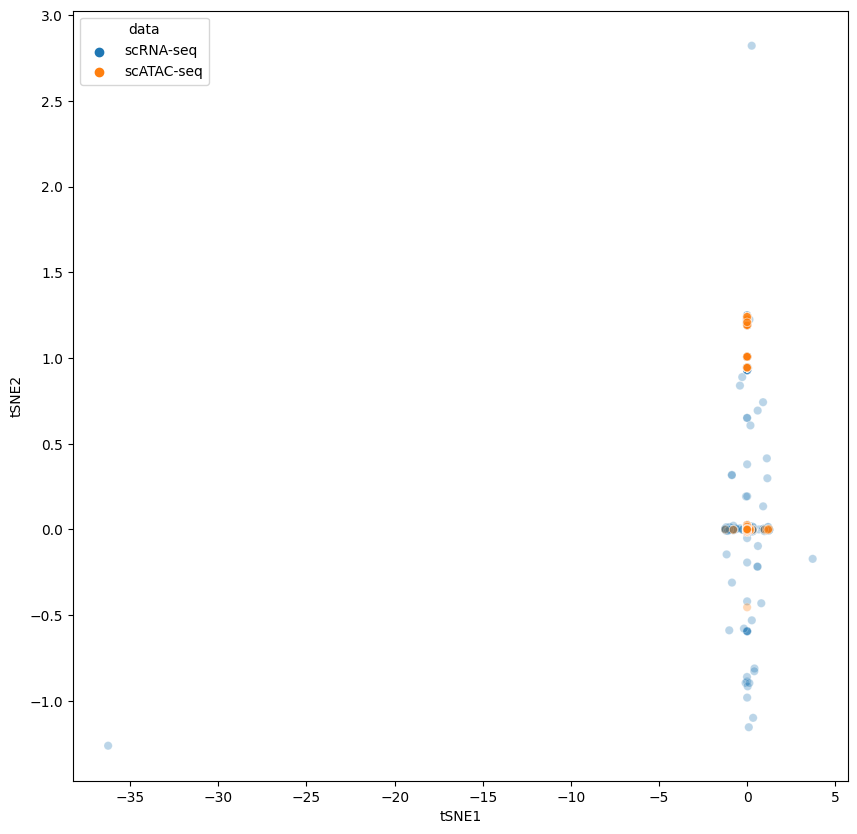

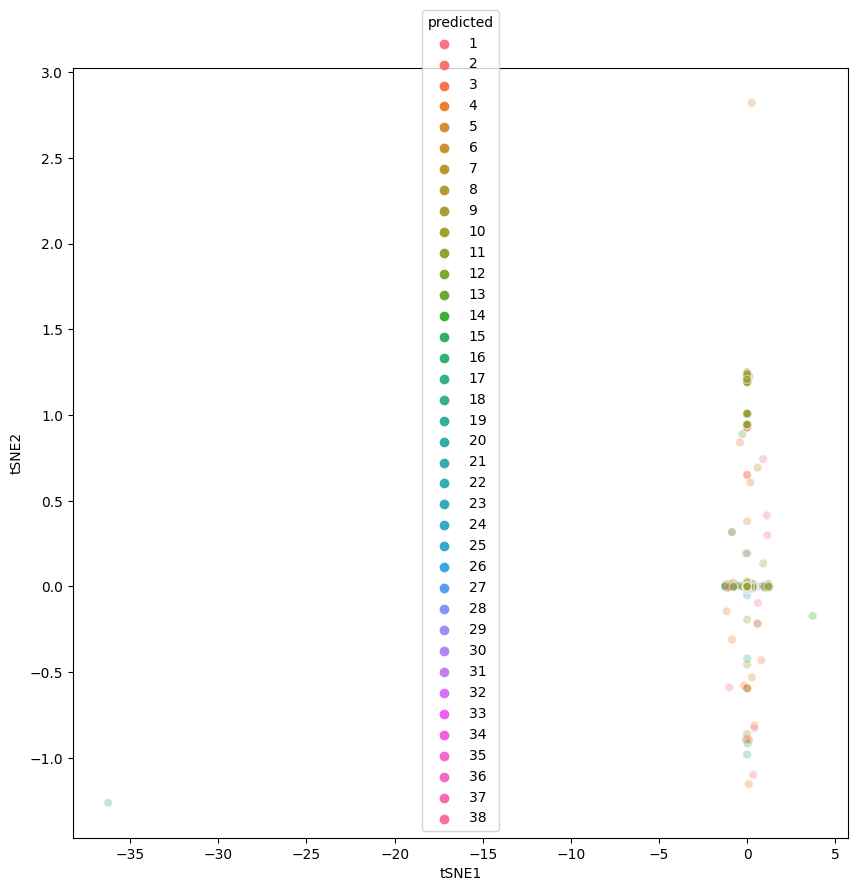

In [6]:
#print(df)
rna_labels = np.loadtxt('./data/maize_cell_type_organized_tricked_switched.txt')
atac_predictions = np.loadtxt('./output/rna_switch_knn_predictions.txt')
labels =  np.concatenate((rna_labels, atac_predictions))
print(df.shape)
print(len(rna_labels))
print(len(atac_predictions))
print(len(labels))
label_to_idx = pd.read_csv('./data/label_to_idx.txt', sep = '\t', header = None)
label_to_idx.shape
label_dic = []
for i in range(label_to_idx.shape[0]):
    label_dic = np.append(label_dic, label_to_idx[0][i][:-2])

#print(label_dic)
print(labels)
print(label_dic[labels.astype(int)])
print(len(label_dic[labels.astype(int)]))

data_label = np.array(["scRNA-seq", "scATAC-seq"])
df['data'] = np.repeat(data_label, [rna_embeddings.shape[0], atac_embeddings.shape[0]], axis=0)
df['predicted'] = label_dic[labels.astype(int)]



plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched.png")

/tmp/ipykernel_163504/608381073.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("sc_predicted_switched.png")


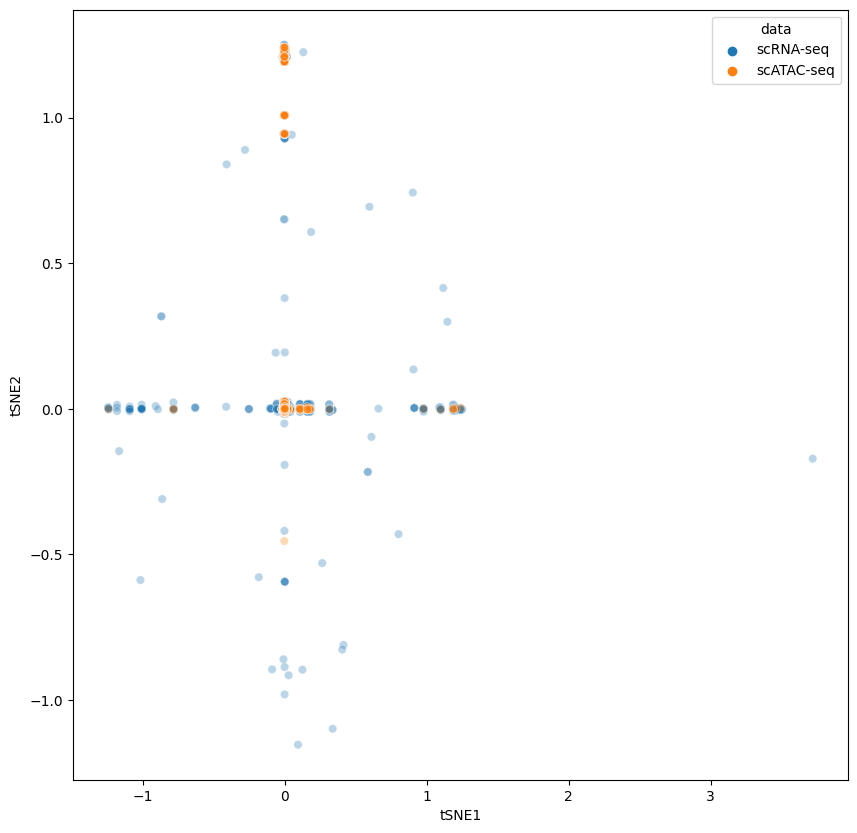

/home/jo10595/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


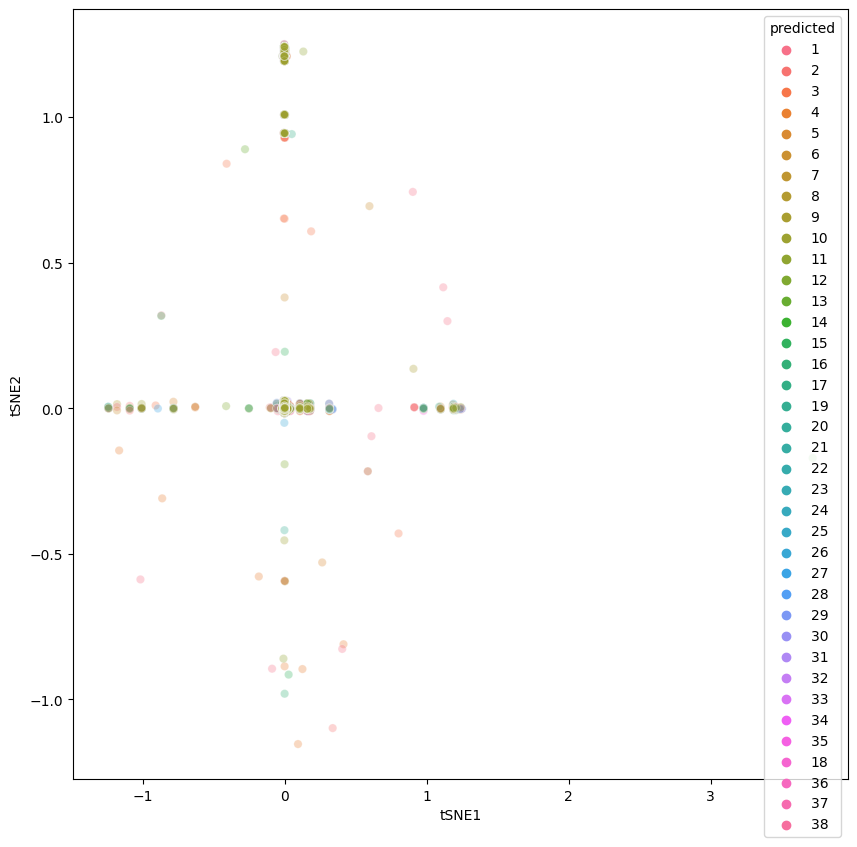

In [11]:
df = df[df.tSNE1 > -35]
df = df[df.tSNE2 < 2.5]
plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched.png")